In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [29]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [30]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [31]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [32]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [33]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [34]:
# Duplicated
df.duplicated().sum()

14342

In [35]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

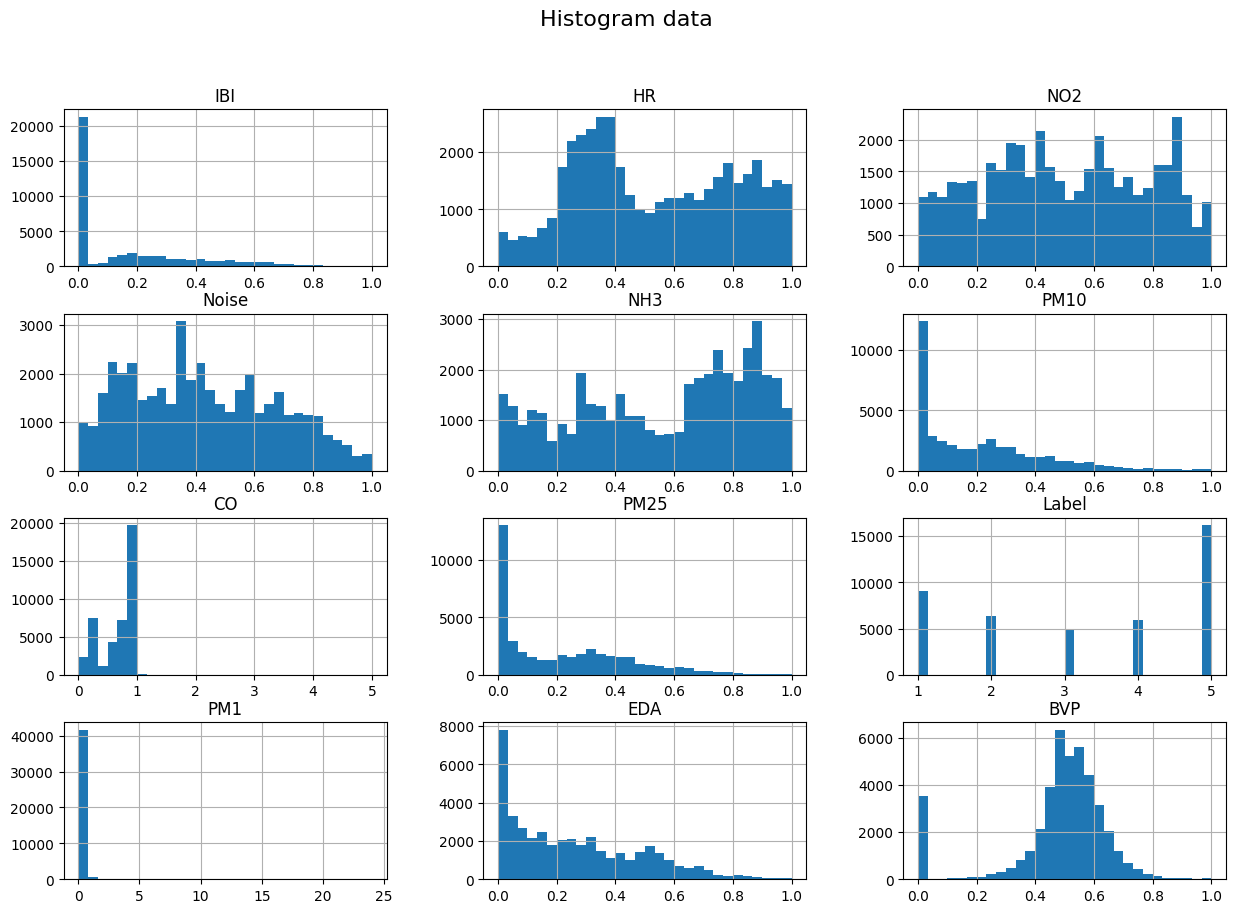

In [36]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [37]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_15262/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


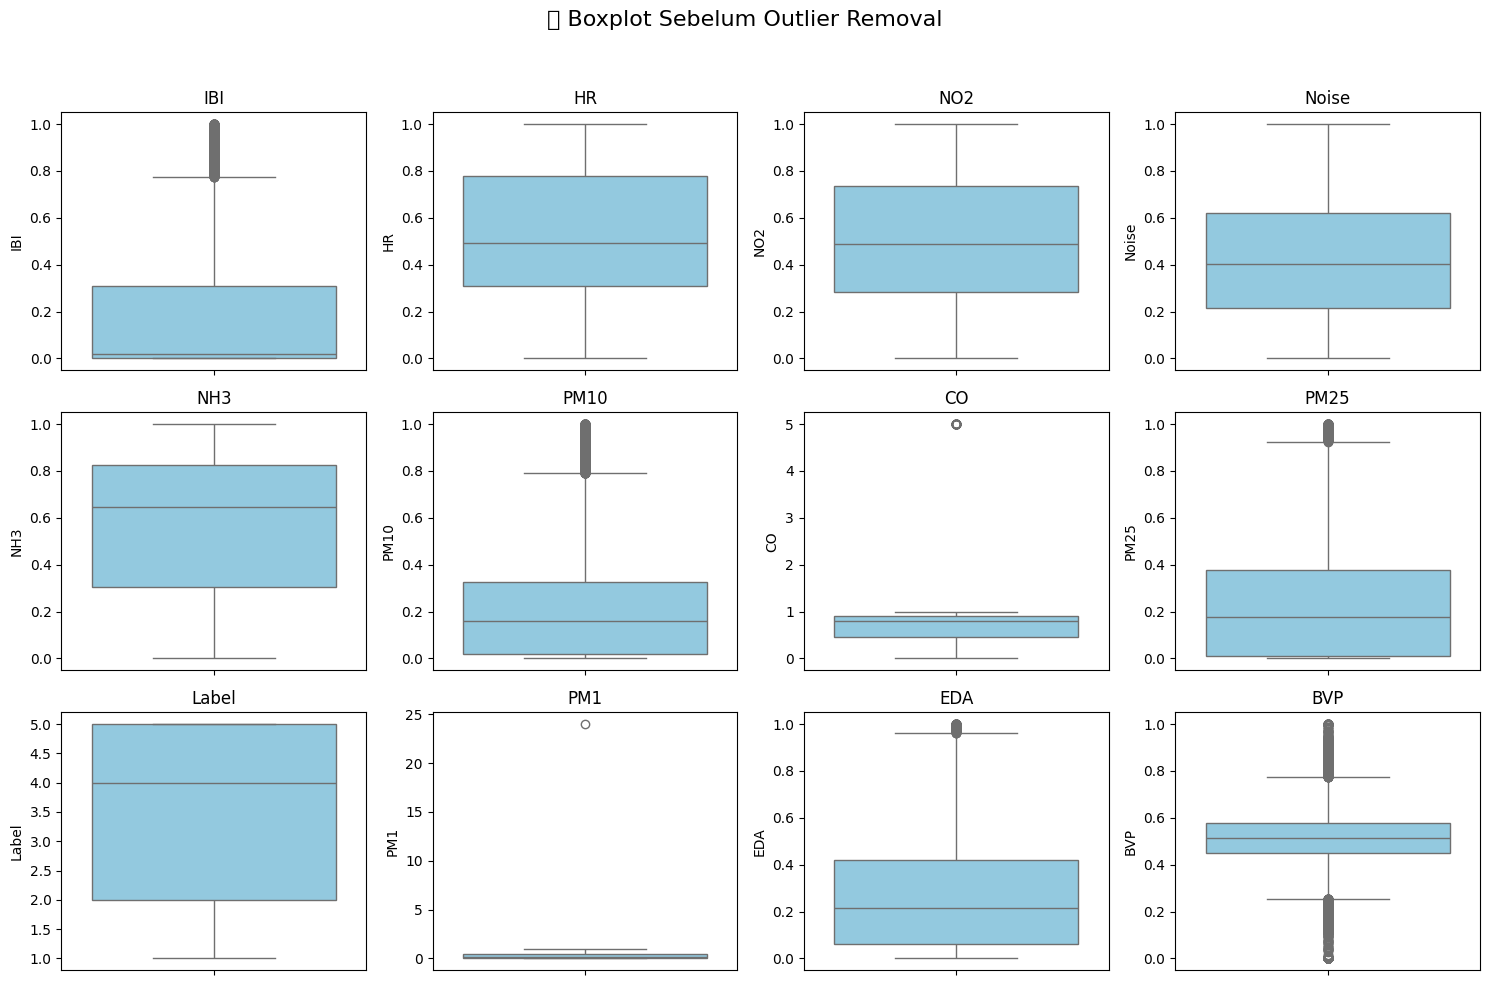

In [38]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [39]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [40]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_15262/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


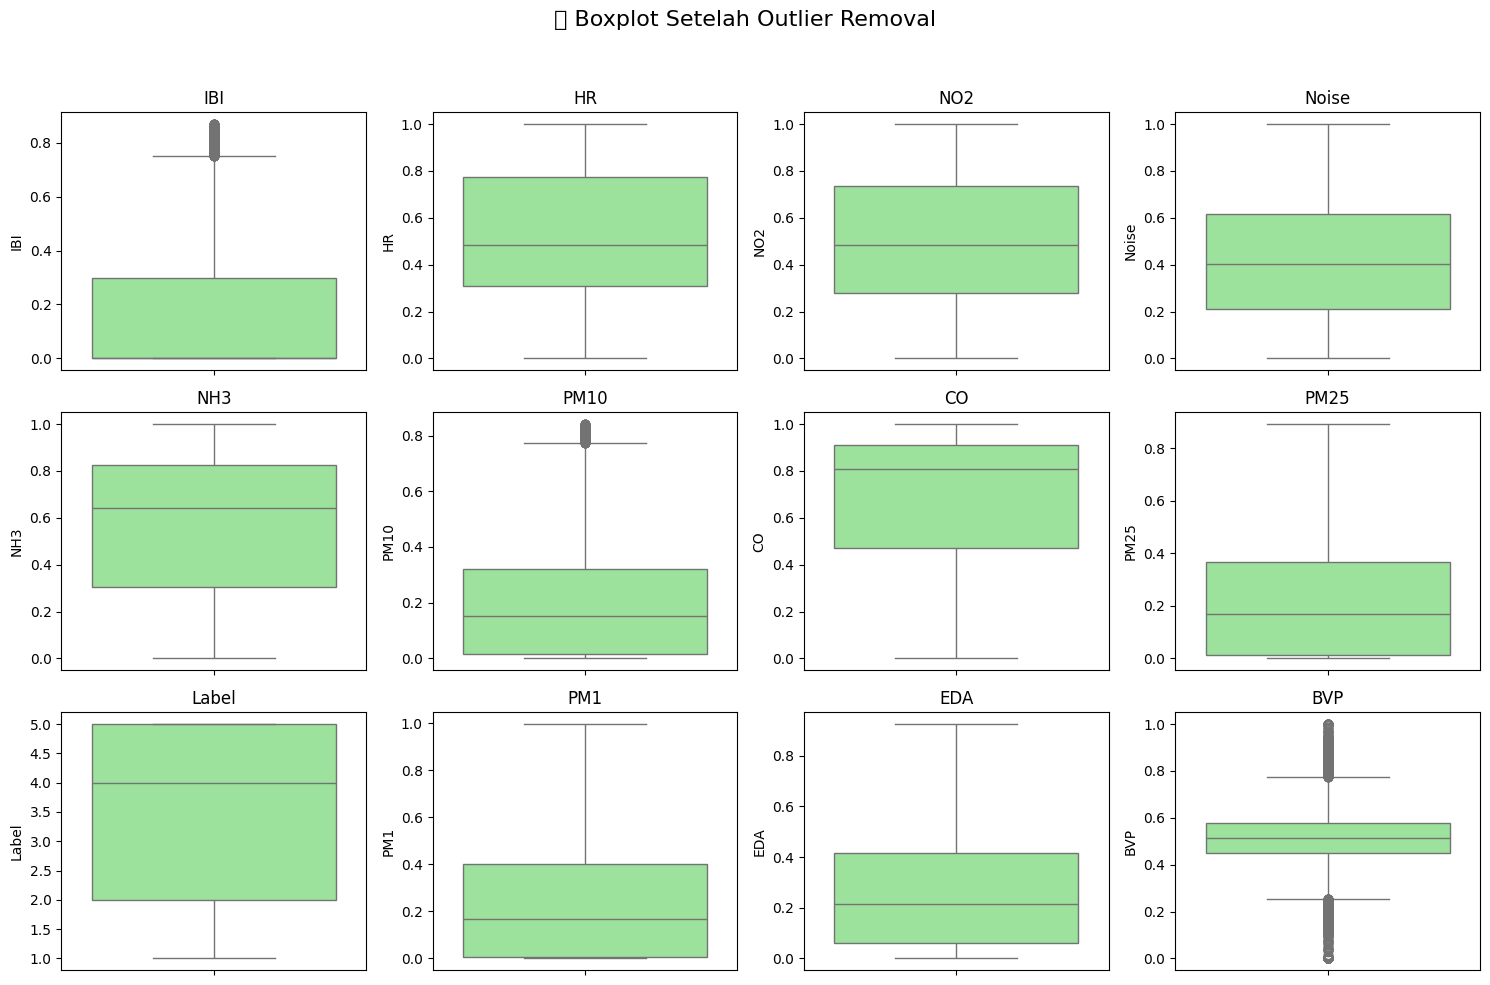

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


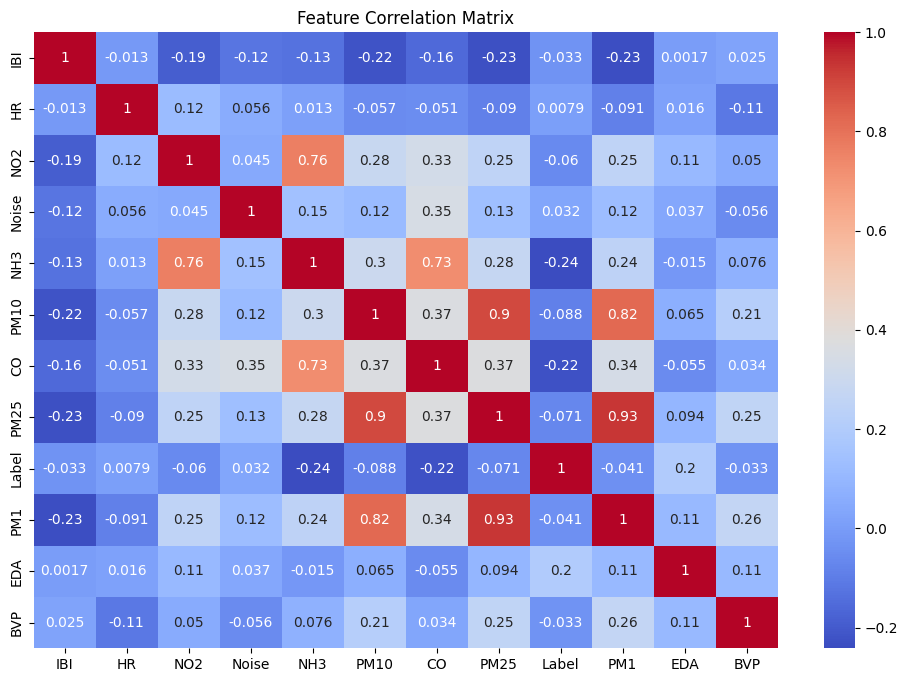

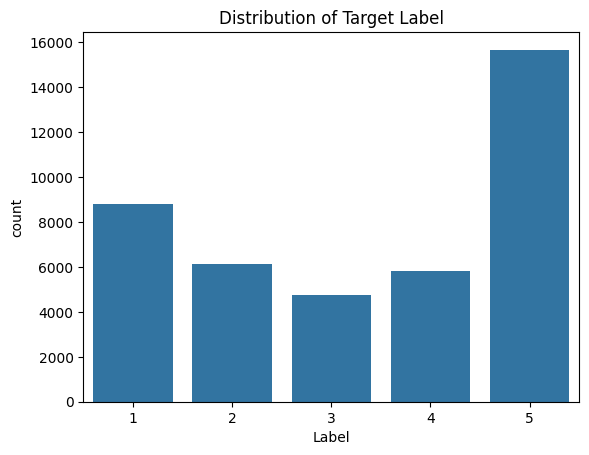

In [42]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [43]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [44]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split train-test dulu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Buat undersampler
rus = RandomUnderSampler(random_state=42)

# Hanya resample data training
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Train balanced:", X_train_rus.shape)
print(y_train_rus.value_counts(), "\n")

print("Test original:", X_test.shape)
print(y_test.value_counts())


Train balanced: (18965, 11)
Label
1    3793
2    3793
3    3793
4    3793
5    3793
Name: count, dtype: int64 

Test original: (8238, 11)
Label
5    3134
1    1761
2    1228
4    1167
3     948
Name: count, dtype: int64


## Prepocessing

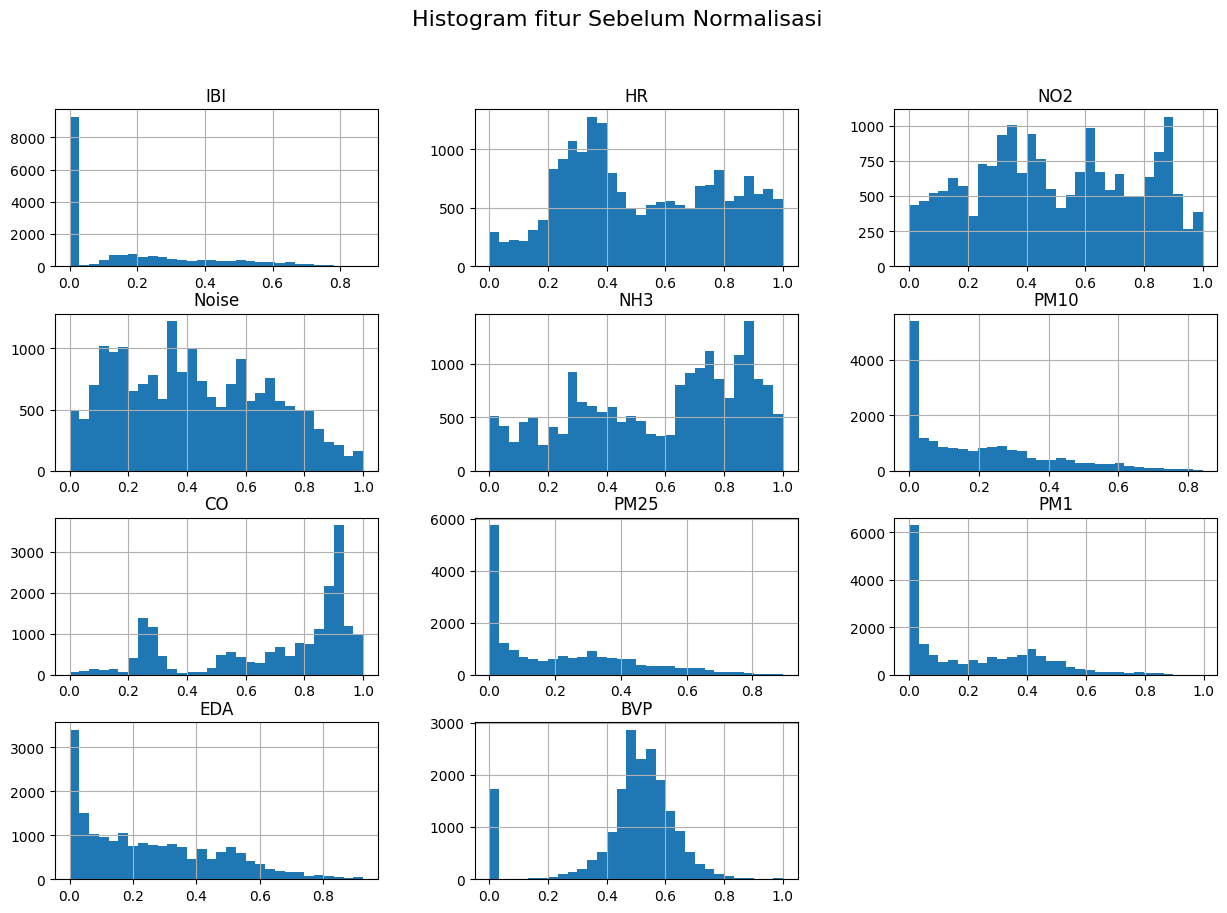

In [46]:
# Histogram sebelum normalisasi
X_train_rus.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [47]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (18965, 11)
Data Test after normalisation = (8238, 11)


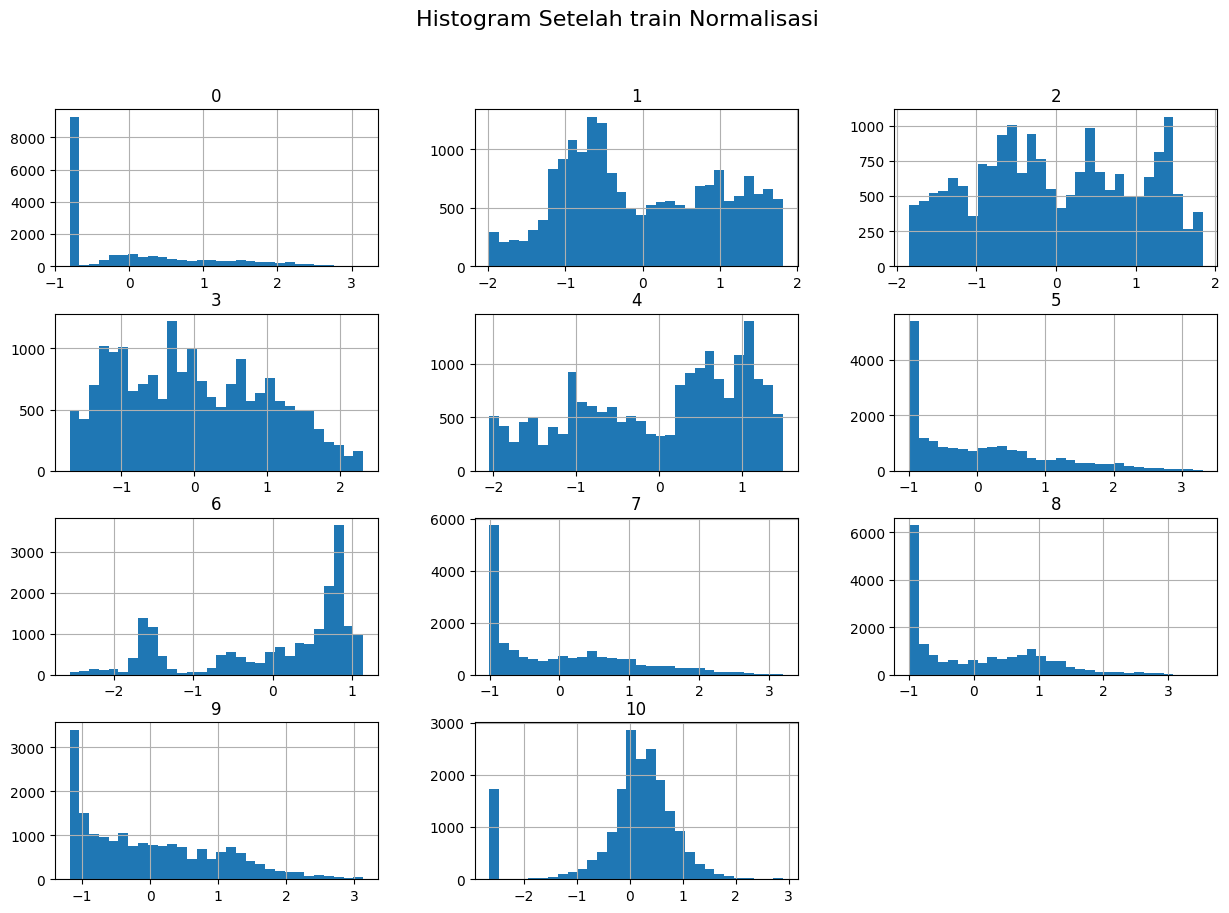

In [48]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

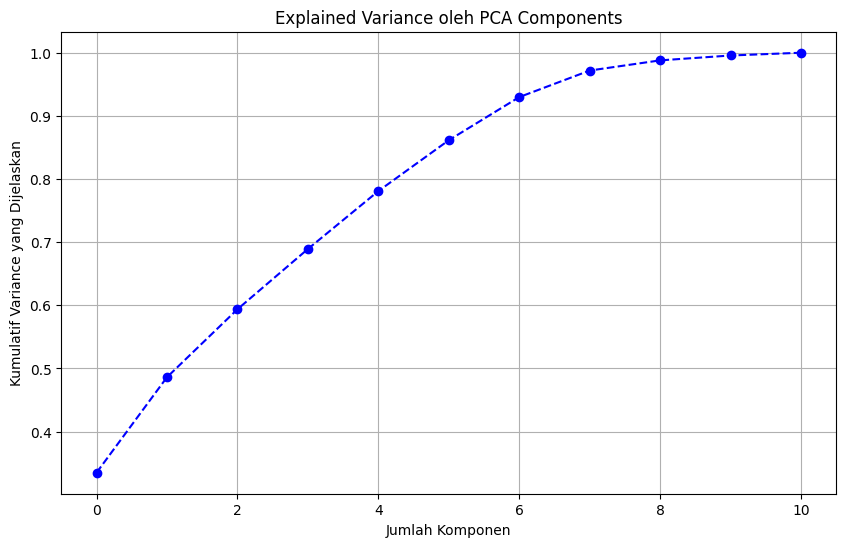

In [49]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [50]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3349 variance terjelaskan
Komponen ke-2: 0.4862 variance terjelaskan
Komponen ke-3: 0.5937 variance terjelaskan
Komponen ke-4: 0.6892 variance terjelaskan
Komponen ke-5: 0.7809 variance terjelaskan
Komponen ke-6: 0.8614 variance terjelaskan
Komponen ke-7: 0.9297 variance terjelaskan
Komponen ke-8: 0.9718 variance terjelaskan
Komponen ke-9: 0.9879 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [51]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 7)
Shape test PCA: (8238, 7)


## Training Data

In [52]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_models(X_train, X_test, y_train, y_test, percobaan="Baseline", output_file="results.csv"):
    # === Daftar model ===
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
    }

    rows = []

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        
        # === Training ===
        model.fit(X_train, y_train)
        
        # === Prediction ===
        y_pred = model.predict(X_test)
        
        # === Evaluasi ===
        report = classification_report(y_test, y_pred, output_dict=True)
        rows.append({
            "Percobaan": percobaan,
            "Model": name,
            "Accuracy": report["accuracy"],
            "Precision": report["macro avg"]["precision"],
            "Recall": report["macro avg"]["recall"],
            "F1-Score": report["macro avg"]["f1-score"]
        })

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.tight_layout()
        plt.show()

    # === Buat dataframe hasil ===
    df_results = pd.DataFrame(rows)
    print("\n📊 Perbandingan Model:")
    print(df_results)

    # === Simpan ke CSV ===
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)

    # === Visualisasi perbandingan ===
    df_plot = df_results[df_results["Percobaan"] == percobaan].set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]]
    df_plot.plot(kind="bar", figsize=(10, 6))
    plt.title(f"Perbandingan Model - {percobaan}")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    return df_results



🔹 Training Random Forest...


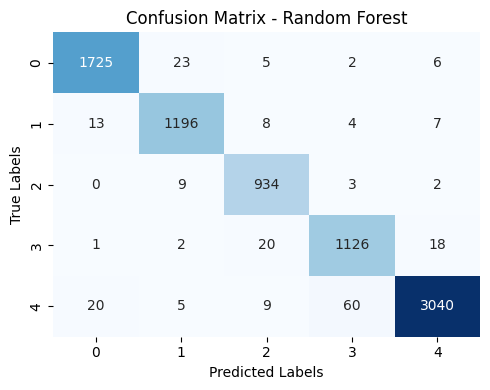


🔹 Training KNN...


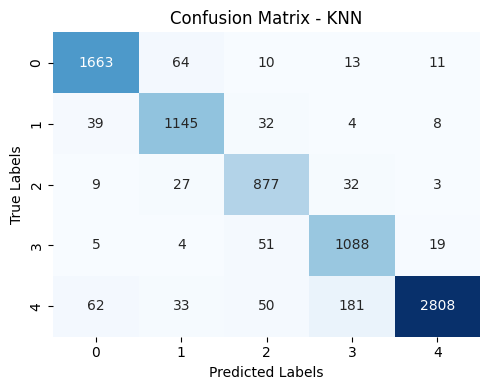


🔹 Training Naive Bayes...


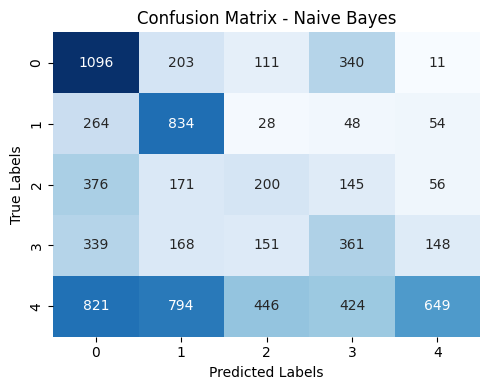


🔹 Training Decision Tree...


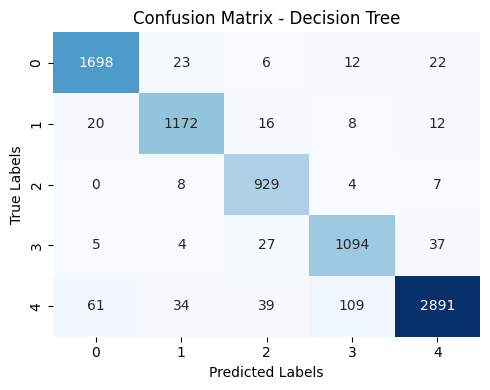


🔹 Training Extra Trees...


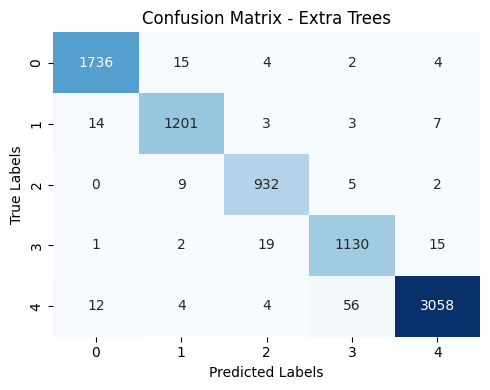


📊 Perbandingan Model:
                         Percobaan          Model  Accuracy  Precision  \
0  Baseline Performa undersampling  Random Forest  0.973659   0.967516   
1  Baseline Performa undersampling            KNN  0.920248   0.901135   
2  Baseline Performa undersampling    Naive Bayes  0.381160   0.391466   
3  Baseline Performa undersampling  Decision Tree  0.944890   0.935000   
4  Baseline Performa undersampling    Extra Trees  0.978029   0.972975   

     Recall  F1-Score  
0  0.974721  0.971030  
1  0.926030  0.912204  
2  0.405784  0.356952  
3  0.951698  0.942849  
4  0.978197  0.975534  


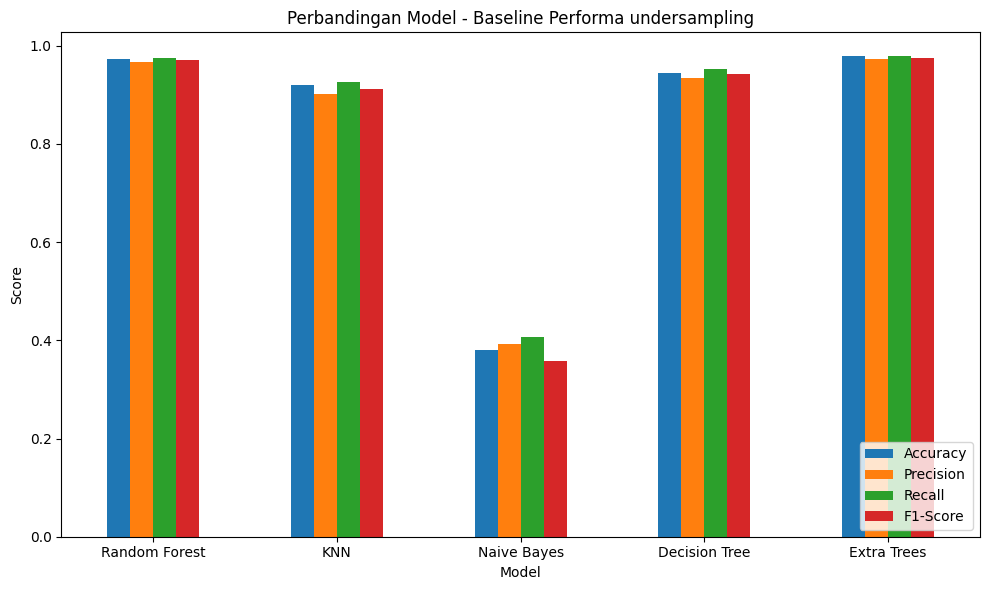

In [53]:
df_results = evaluate_models(
    X_train_rus, X_test, y_train_rus, y_test,
    percobaan="Baseline Performa undersampling",
    output_file="hasil_model.csv"
)



🔹 Training Random Forest...


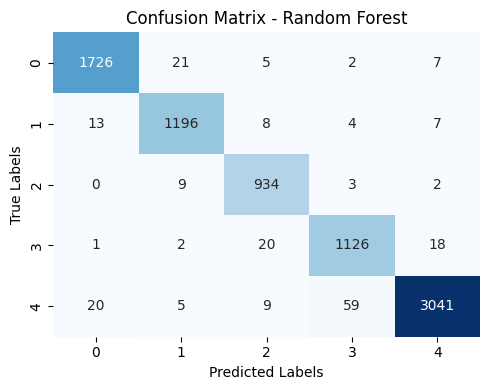


🔹 Training KNN...


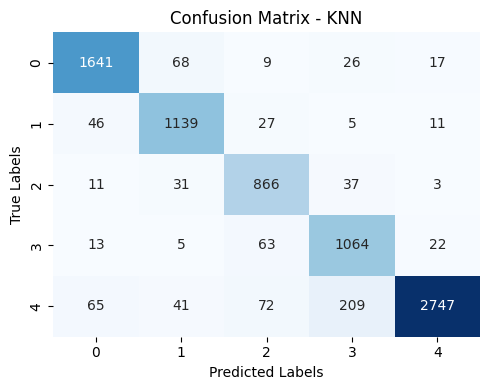


🔹 Training Naive Bayes...


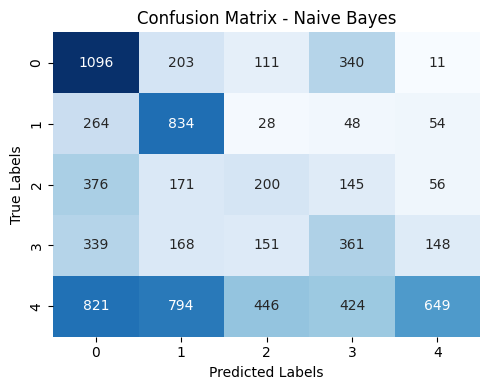


🔹 Training Decision Tree...


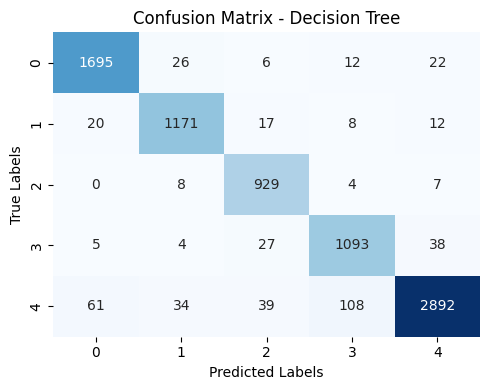


🔹 Training Extra Trees...


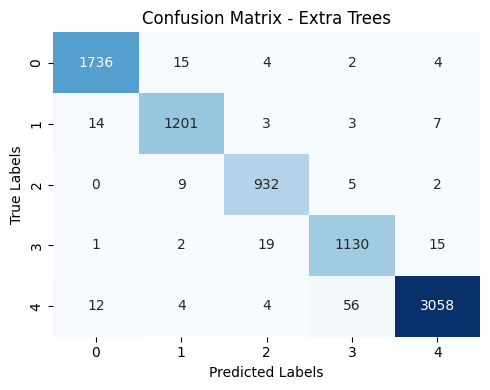


📊 Perbandingan Model:
                              Percobaan          Model  Accuracy  Precision  \
0  normalization Performa undersampling  Random Forest  0.973901   0.967927   
1  normalization Performa undersampling            KNN  0.905195   0.884134   
2  normalization Performa undersampling    Naive Bayes  0.381160   0.391466   
3  normalization Performa undersampling  Decision Tree  0.944404   0.934403   
4  normalization Performa undersampling    Extra Trees  0.978029   0.972975   

     Recall  F1-Score  
0  0.974898  0.971328  
1  0.912228  0.896326  
2  0.405784  0.356952  
3  0.951087  0.942249  
4  0.978197  0.975534  


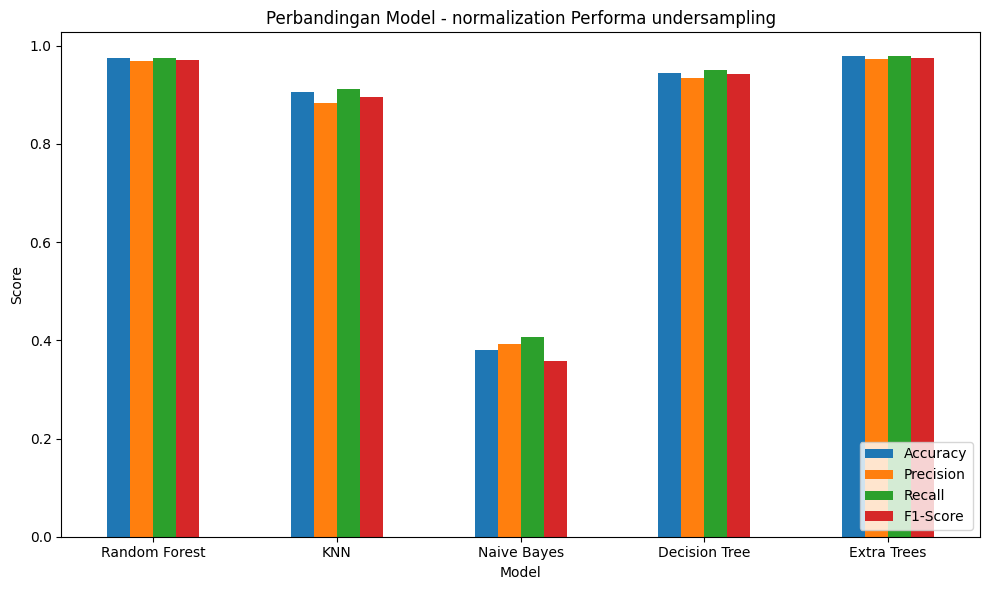

In [54]:
df_results = evaluate_models(
    X_train_scaled, X_test_scaled, y_train_rus, y_test,
    percobaan="normalization Performa undersampling",
    output_file="hasil_model.csv"
)

In [55]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 8 komponen
pca = PCA(n_components=8)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 8)
Shape test PCA: (8238, 8)



🔹 Training Random Forest...


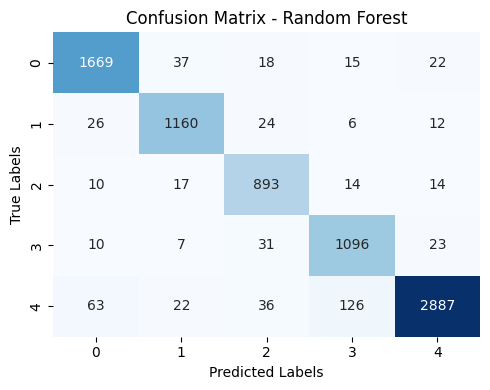


🔹 Training KNN...


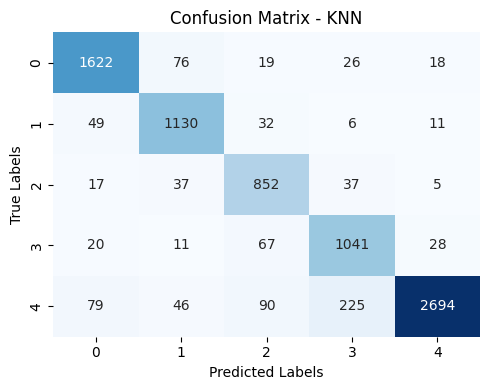


🔹 Training Naive Bayes...


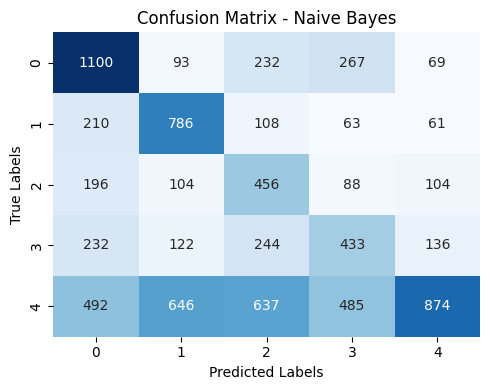


🔹 Training Decision Tree...


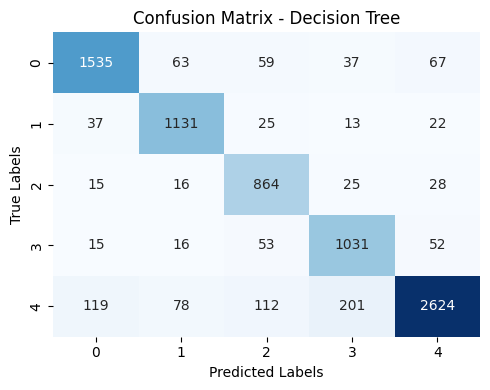


🔹 Training Extra Trees...


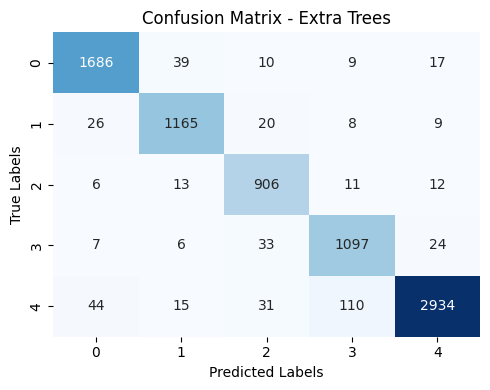


📊 Perbandingan Model:
                      Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 8 Performa undersampling  Random Forest  0.935300   0.922211  0.938943   
1  pca 8 Performa undersampling            KNN  0.890872   0.867590  0.898326   
2  pca 8 Performa undersampling    Naive Bayes  0.442947   0.448150  0.479127   
3  pca 8 Performa undersampling  Decision Tree  0.872178   0.852771  0.884959   
4  pca 8 Performa undersampling    Extra Trees  0.945375   0.933536  0.947601   

   F1-Score  
0  0.930017  
1  0.880763  
2  0.434323  
3  0.866476  
4  0.940188  


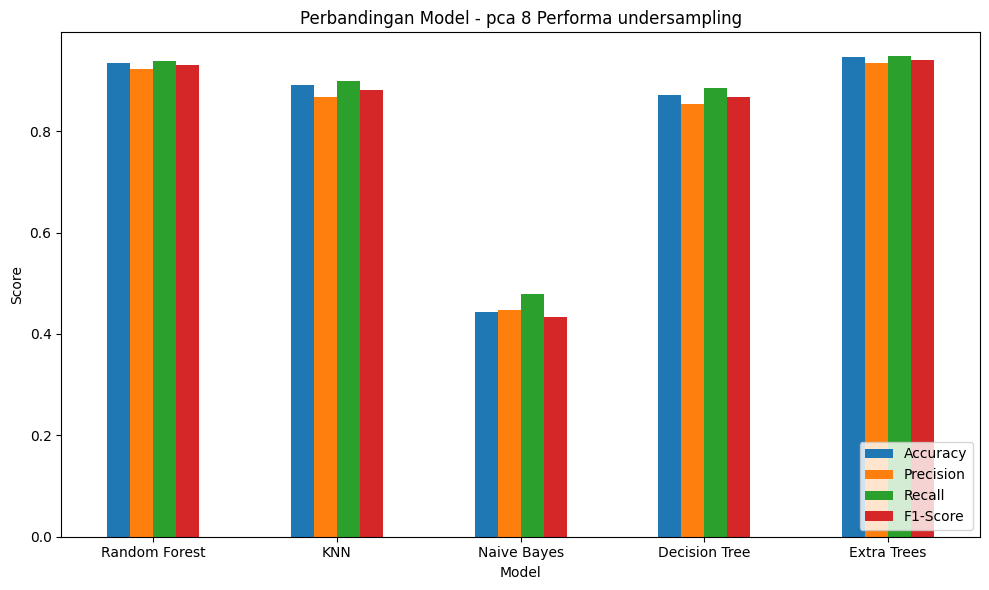

In [56]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train_rus, y_test,
    percobaan="pca 8 Performa undersampling",
    output_file="hasil_model.csv"
)


In [57]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 7)
Shape test PCA: (8238, 7)



🔹 Training Random Forest...


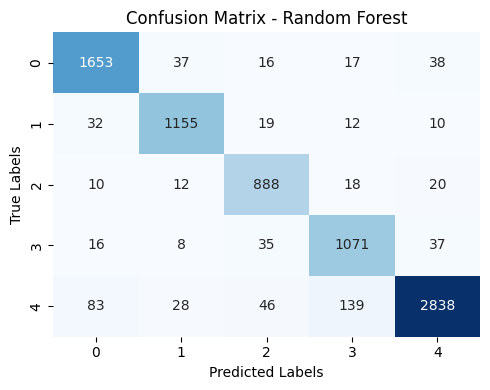


🔹 Training KNN...


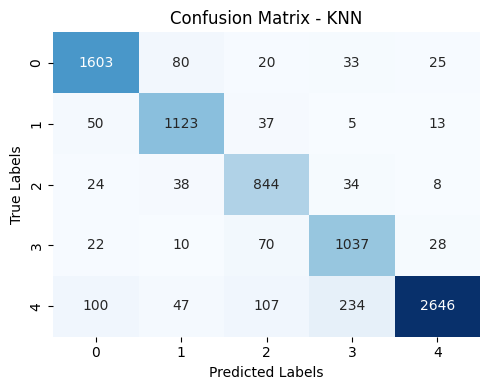


🔹 Training Naive Bayes...


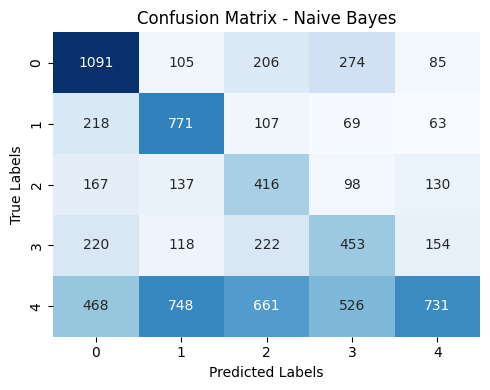


🔹 Training Decision Tree...


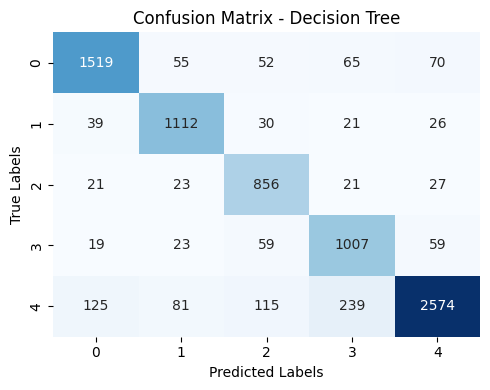


🔹 Training Extra Trees...


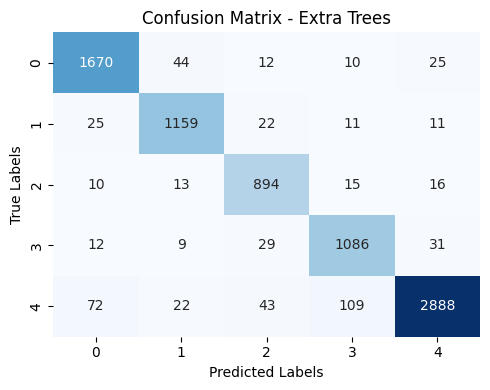


📊 Perbandingan Model:
                      Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 7 Performa undersampling  Random Forest  0.923161   0.910734  0.927845   
1  pca 7 Performa undersampling            KNN  0.880432   0.856821  0.889592   
2  pca 7 Performa undersampling    Naive Bayes  0.420248   0.424022  0.461525   
3  pca 7 Performa undersampling  Decision Tree  0.857975   0.837794  0.871056   
4  pca 7 Performa undersampling    Extra Trees  0.934329   0.922237  0.937454   

   F1-Score  
0  0.918690  
1  0.870635  
2  0.413534  
3  0.851625  
4  0.929428  


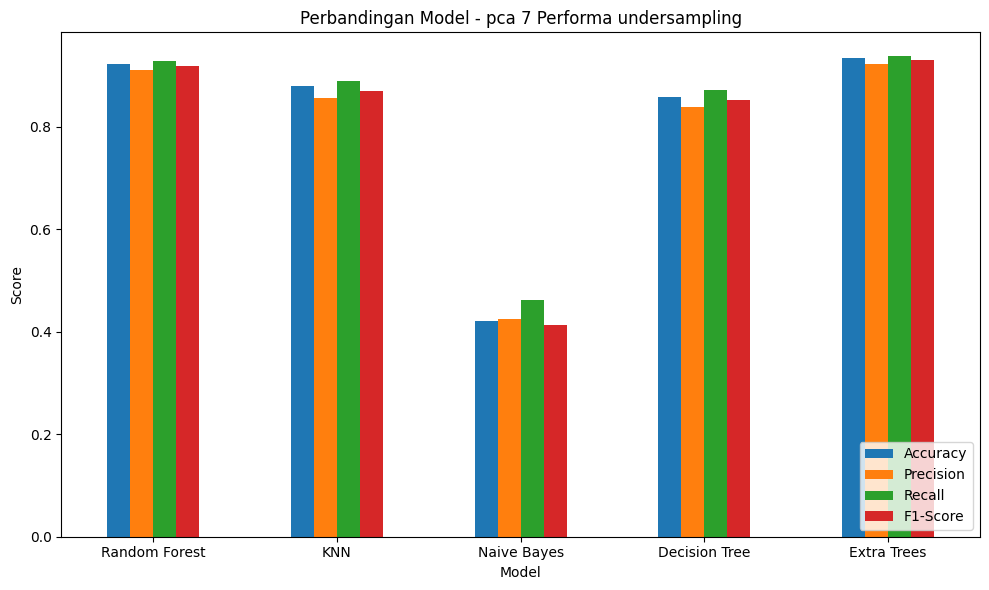

In [58]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train_rus, y_test,
    percobaan="pca 7 Performa undersampling",
    output_file="hasil_model.csv"
)


In [59]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 6)
Shape test PCA: (8238, 6)



🔹 Training Random Forest...


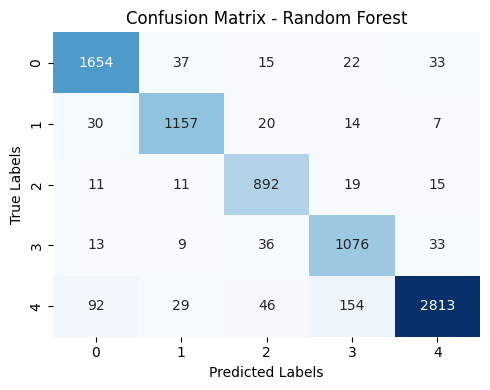


🔹 Training KNN...


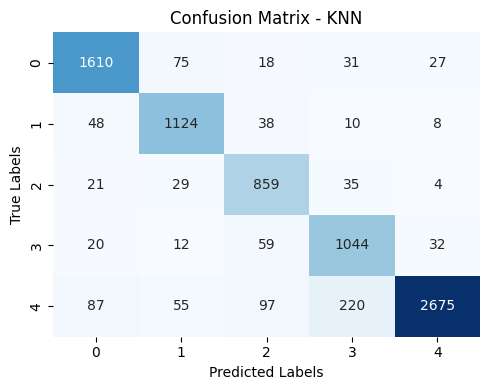


🔹 Training Naive Bayes...


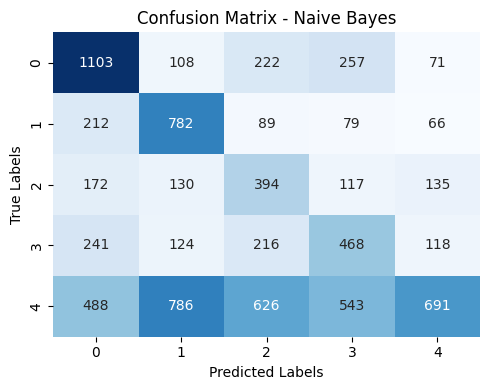


🔹 Training Decision Tree...


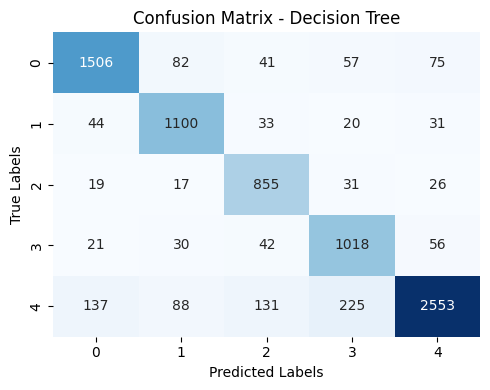


🔹 Training Extra Trees...


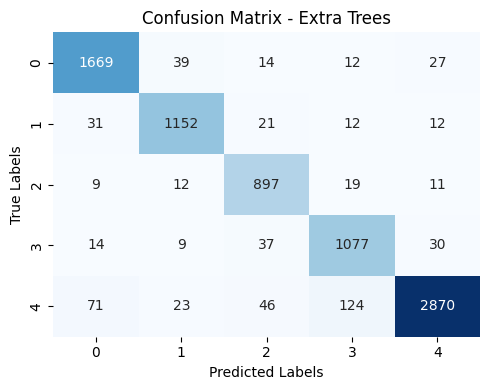


📊 Perbandingan Model:
                      Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 6 Performa undersampling  Random Forest  0.921583   0.908153  0.928389   
1  pca 6 Performa undersampling            KNN  0.887594   0.864942  0.896765   
2  pca 6 Performa undersampling    Naive Bayes  0.417334   0.423301  0.460056   
3  pca 6 Performa undersampling  Decision Tree  0.853605   0.833611  0.867959   
4  pca 6 Performa undersampling    Extra Trees  0.930444   0.917100  0.934142   

   F1-Score  
0  0.917379  
1  0.878492  
2  0.409881  
3  0.847961  
4  0.925035  


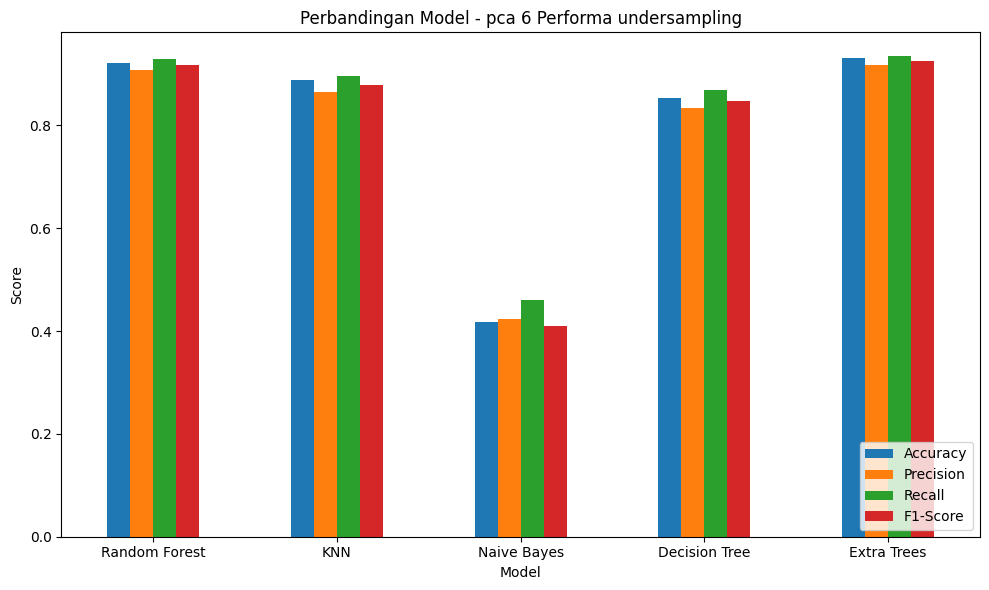

In [60]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train_rus, y_test,
    percobaan="pca 6 Performa undersampling",
    output_file="hasil_model.csv"
)


In [61]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 5 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 5)
Shape test PCA: (8238, 5)



🔹 Training Random Forest...


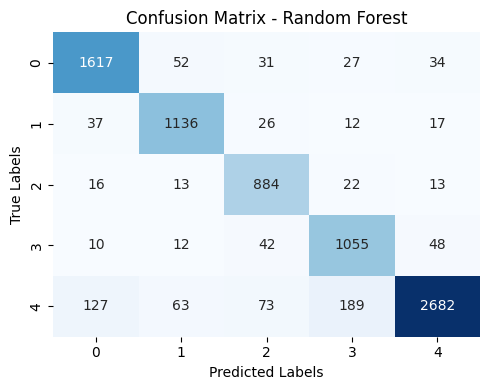


🔹 Training KNN...


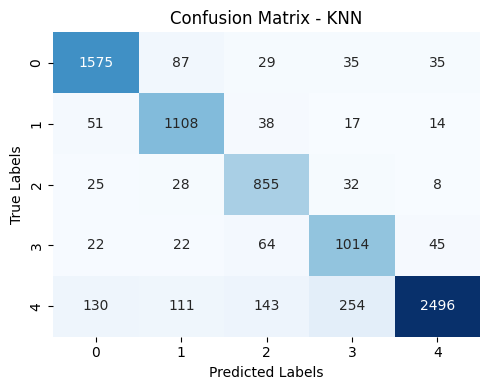


🔹 Training Naive Bayes...


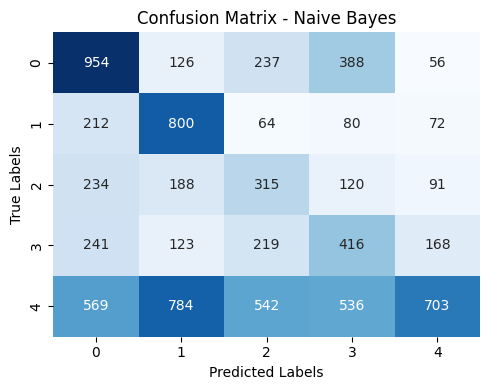


🔹 Training Decision Tree...


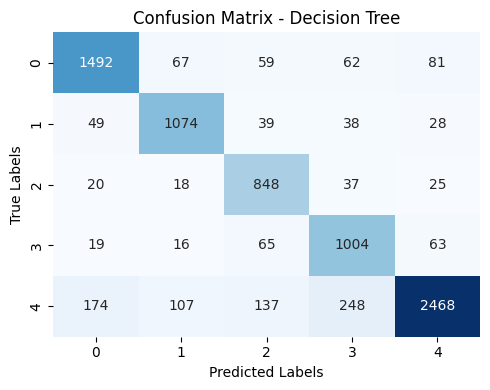


🔹 Training Extra Trees...


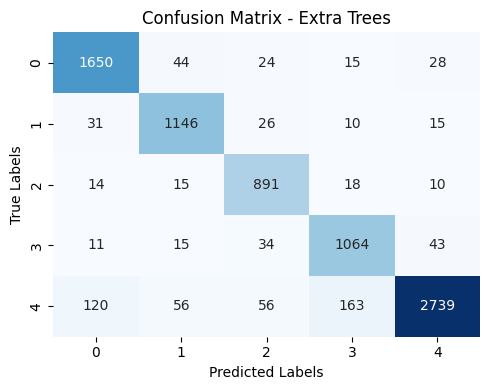


📊 Perbandingan Model:
                      Percobaan          Model  Accuracy  Precision    Recall  \
0  pca 5 Performa undersampling  Random Forest  0.895120   0.878120  0.907120   
1  pca 5 Performa undersampling            KNN  0.855547   0.831740  0.872776   
2  pca 5 Performa undersampling    Naive Bayes  0.386987   0.394272  0.421253   
3  pca 5 Performa undersampling  Decision Tree  0.835882   0.815192  0.852834   
4  pca 5 Performa undersampling    Extra Trees  0.909201   0.893975  0.919154   

   F1-Score  
0  0.890878  
1  0.848142  
2  0.376824  
3  0.830131  
4  0.905345  


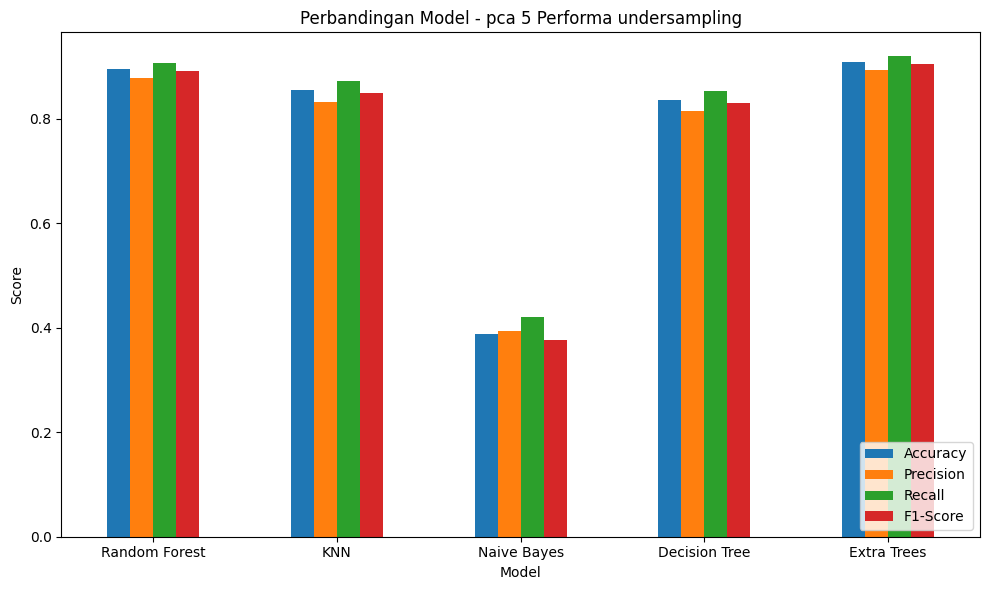

In [62]:
df_results = evaluate_models(
    X_train_pca, X_test_pca, y_train_rus, y_test,
    percobaan="pca 5 Performa undersampling",
    output_file="hasil_model.csv"
)
